# Clustering de usuarios
Agrupar a los usuarios en función de las funciones de las matrices de similitud generadas

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn_extra.cluster import KMedoids
from sklearn.metrics import davies_bouldin_score

In [2]:
users = pd.read_csv('data/Prado_users_similarity.csv', index_col=0)
prado_users = pd.read_csv('data/Prado_users_scaled.csv', index_col=0)

## 1. Número óptimo de clusters

In [3]:
%%capture output
K_MAX = 11
davies_boulding = np.zeros(K_MAX-2)

for k in range(2, K_MAX):
    km = KMedoids(metric='precomputed', n_clusters=k)
    km.fit(users)
    davies_boulding[k-2] = davies_bouldin_score(users, km.labels_)

[2.53121179 3.13107344 2.59678052 3.99842166 3.90233735 2.7047922
 3.24525618 2.50853736 2.98189906]


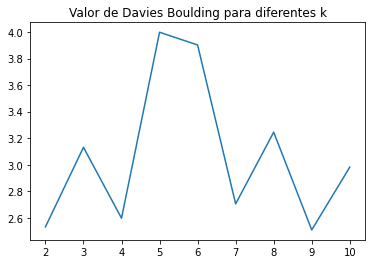

In [4]:
plt.plot(range(2, K_MAX), davies_boulding)
plt.title('Valor de Davies Boulding para diferentes k')

print(davies_boulding)
plt.show()

In [24]:
min_val = np.min(davies_boulding)
min_arg = np.argmin(davies_boulding)

print("Min: {}, Arg: {}, Val: {}".format(min_val, min_arg, range(2, K_MAX)[min_arg]))

Min: 2.5085373631408308, Arg: 7, Val: 9


## 2. Clustering

In [25]:
%%capture output

kmedoids = KMedoids(metric='precomputed', n_clusters=2)

kmedoids.fit(users)

In [26]:
import collections
collections.Counter(kmedoids.labels_)

Counter({0: 86, 1: 85})

In [27]:
kmedoids.medoid_indices_

array([140, 129], dtype=int64)

In [28]:
davies_bouldin_score(prado_users, kmedoids.labels_)

2.5089939869947426

In [7]:
def add_medoids(data):
  medoids = np.empty(len(data))
  for i in range(len(data)):
    for idx, m in enumerate(kmedoids.medoid_indices_):
      if i == m:
        medoids[i] = idx
        break
      else:
        medoids[i] = -1
  return medoids

In [12]:
users_clustered = pd.read_csv("data/Prado_users.csv")
users_clustered['cluster'] = kmedoids.labels_
users_clustered['medoid'] = add_medoids(users_clustered)

users_scaled_clustered = pd.read_csv("data/Prado_users_scaled.csv")
users_scaled_clustered['cluster'] = kmedoids.labels_
users_scaled_clustered['medoid'] = add_medoids(users_scaled_clustered)

In [13]:
users_clustered.to_csv("data/Prado_users_clusters.csv", index=0)
users_scaled_clustered.to_csv("data/Prado_users_scaled_clusters.csv", index=0)

## ------

In [16]:
%%capture output
km = KMedoids(metric='precomputed', n_clusters=2)
km.fit(users)

In [18]:
km.medoid_indices_

array([140, 129], dtype=int64)

## ------

In [1]:
def show_clusters(data, labels):
  palette = sns.color_palette('hls', n_colors=len(set(labels)))
  sns.scatterplot(x=data.iloc[:, 0], y=data.iloc[:, 1], hue=labels, palette=palette)
  plt.axis('off')
  plt.show()

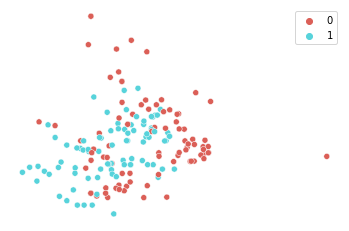

In [24]:
show_clusters(users, km.labels_)